In [92]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video
from helpers.dataset_ver2 import collection_of_experiments
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
common_folder = '/scratch/pp2681/mom6/Apr2022/R4'
exps = ['EXP'+str(i) for i in range(1,211)]

In [101]:
ds = collection_of_experiments(common_folder, exps, additional_subfolder='output')

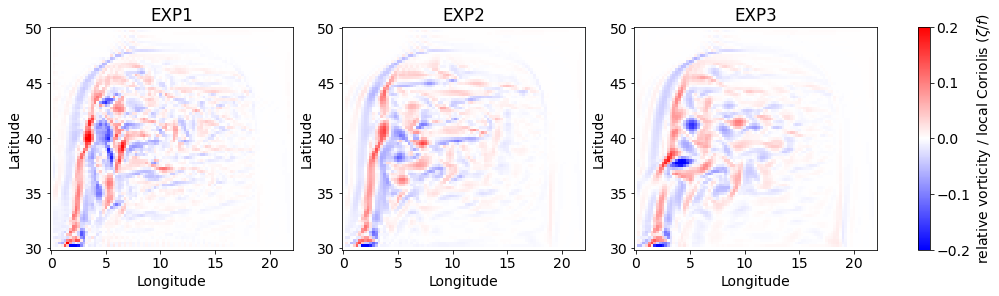

In [102]:
ds.plot_relative_vorticity_snapshot(exps[:3]);

<Figure size 1080x540 with 0 Axes>

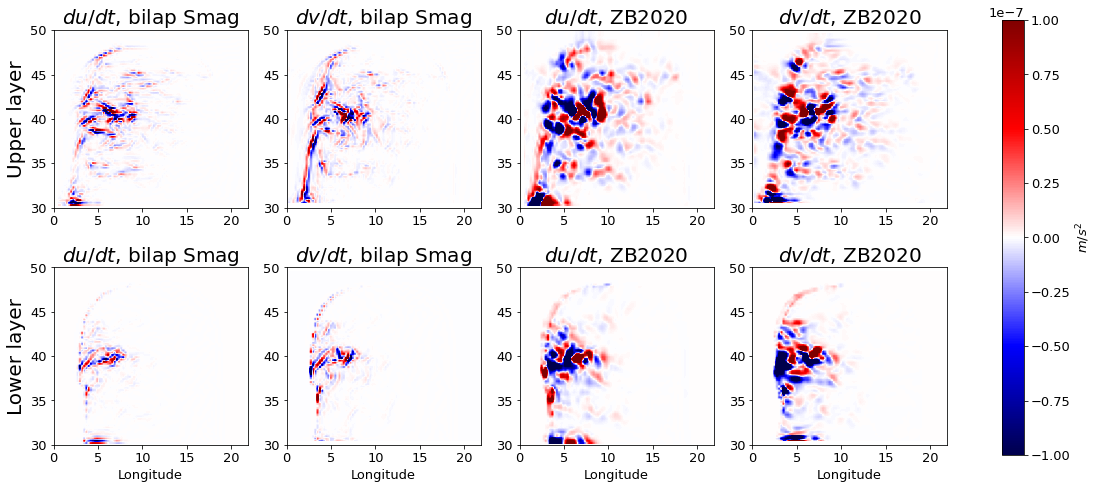

In [96]:
ds.plot_SGS_snapshot('EXP205')

# DNS dataset

In [103]:
common_folder = '/scratch/pp2681/mom6/Feb2022/bare'
exps = ('R2', 'R4', 'R8', 'R16', 'R32', 'R64')
ds = collection_of_experiments(common_folder, exps, additional_subfolder='output')

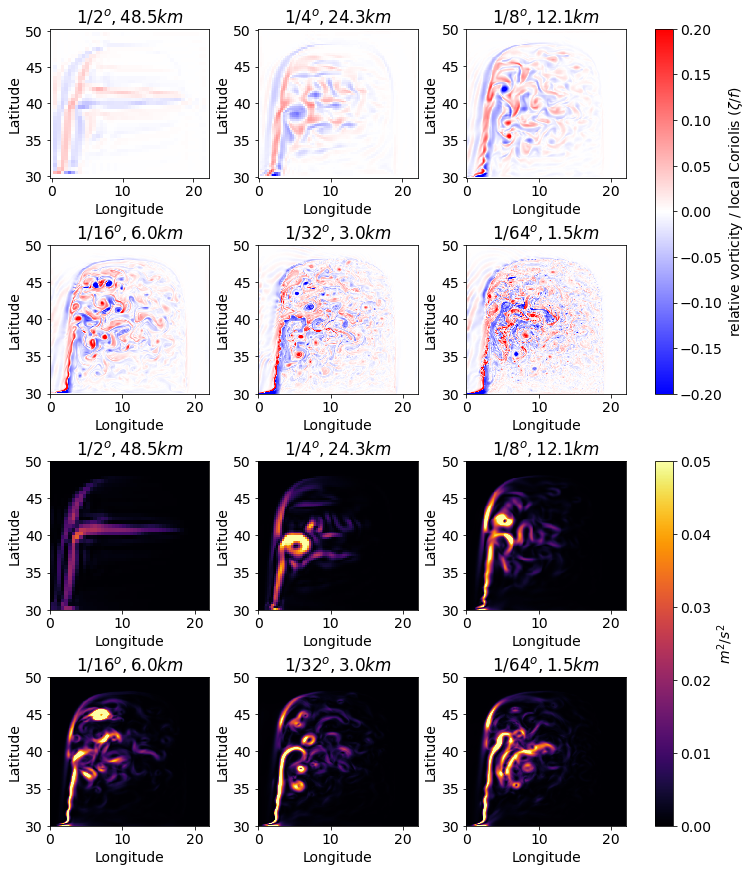

In [123]:
fig, ax = ds.get_axes(nfig=12,ncol=3,size=3.)
ds.plot_relative_vorticity_snapshot(exps, names=['$1/2^o, 48.5km$', '$1/4^o, 24.3km$','$1/8^o, 12.1km$','$1/16^o, 6.0km$','$1/32^o, 3.0km$','$1/64^o, 1.5km$'],ax=ax[:6]);
ds.plot_KE_snapshot(exps, names=['$1/2^o, 48.5km$', '$1/4^o, 24.3km$','$1/8^o, 12.1km$','$1/16^o, 6.0km$','$1/32^o, 3.0km$','$1/64^o, 1.5km$'],ax=ax[6:]);

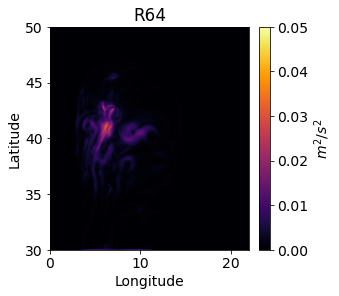

In [122]:
ds.plot_KE_snapshot(['R64',],zl=1);

# Double Gyre. Model domain and layer interfaces
- Model domain - "bowl" with one vertical wall
- There are two fluid layers. Interface between them is shown in orange.
- Mean "ciruclation" (given by SSH) is shown by contours.
- Turbulence is forced by wind (in blue lines)

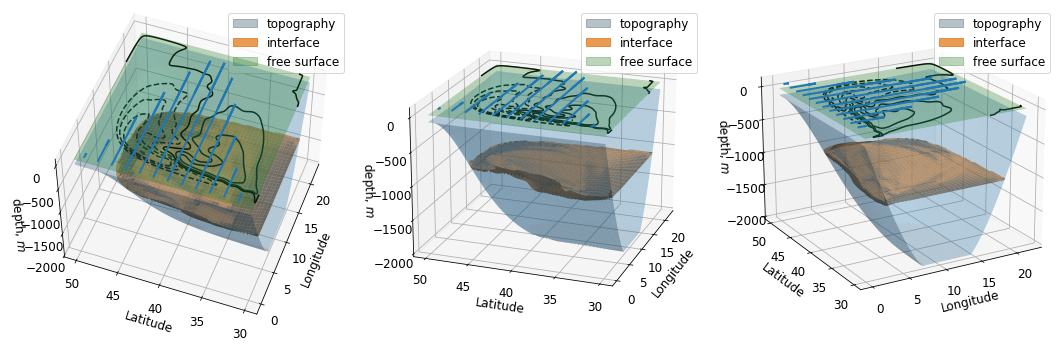

In [41]:
ds.plot_domain('R16')
plt.savefig('domain.png', dpi=150)

# Relative vorticity in units of local Coriolis parameter

In [106]:
for exp in ['R2', 'R4', 'R8', 'R16', 'R32', 'R64']:
    dx = ds[exp].param.dxT
    dy = ds[exp].param.dyT
    S_sqrt = (dx*dy)**0.5
    print(float(S_sqrt.mean()/1000))

48.54686981818251
24.27339523729545
12.136692659646272
6.068345709947112
3.0341727774890277
1.5170863790589468


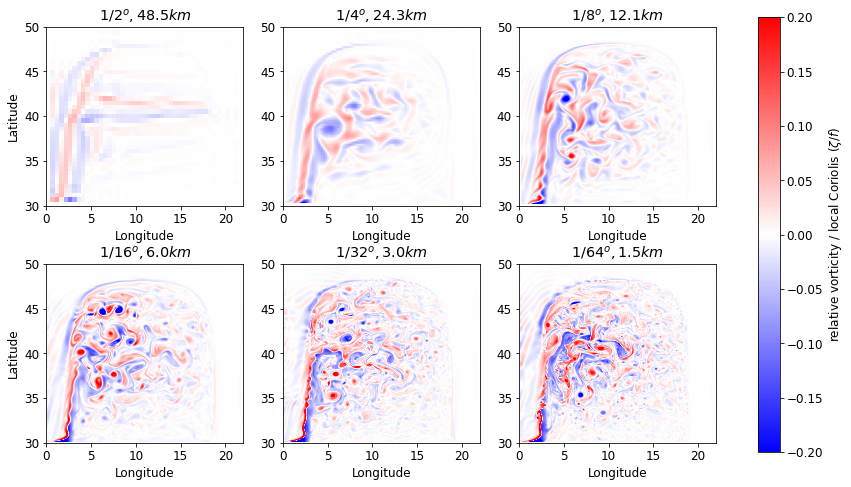

In [107]:
ds.plot_relative_vorticity_snapshot(('R2','R4', 'R8', 'R16', 'R32', 'R64'), 
                                    names=['$1/2^o, 48.5km$', '$1/4^o, 24.3km$','$1/8^o, 12.1km$','$1/16^o, 6.0km$','$1/32^o, 3.0km$','$1/64^o, 1.5km$'])
plt.savefig('vorticity_convergence.png', dpi=150)

In [10]:
video_name = ds.plot_relative_vorticity_animation(exps, timeover=50, Time=-1, zl=0)
Video(video_name,width=1000)

# Kinetic energy snapshot

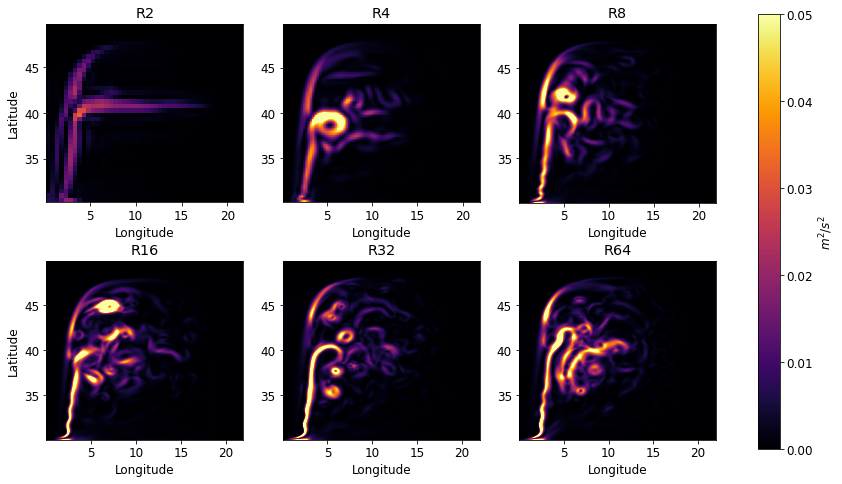

In [7]:
ds.plot_KE_snapshot(('R2','R4', 'R8', 'R16', 'R32', 'R64'))

# Eddy kinetic energy averaged over 10 years, upper layer

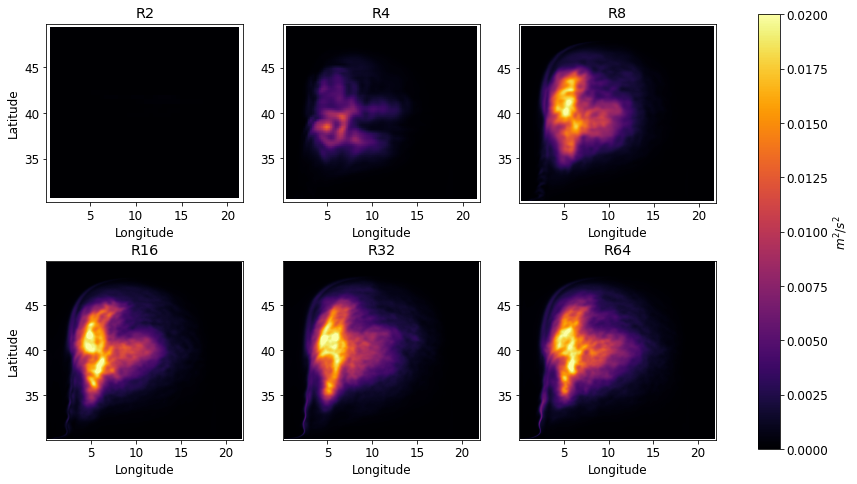

In [8]:
ds.plot_EKE(('R2','R4', 'R8', 'R16', 'R32', 'R64'))

# EKE, lower layer

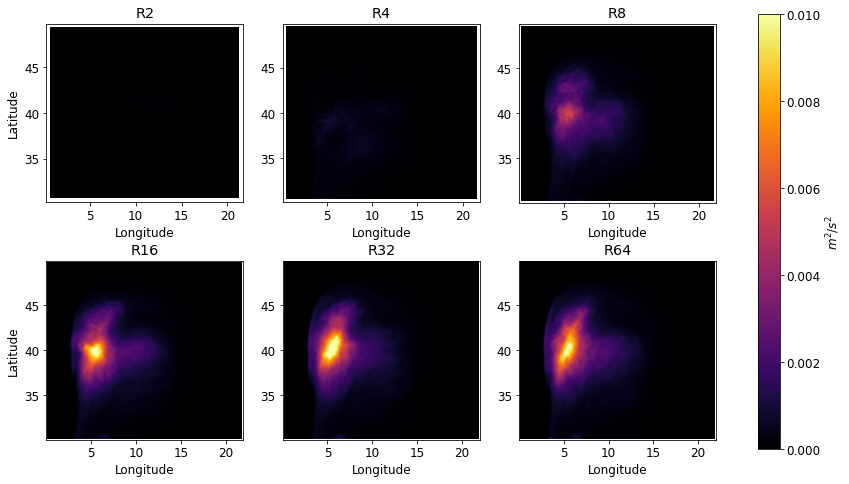

In [9]:
ds.plot_EKE(('R2','R4', 'R8', 'R16', 'R32', 'R64'), zl=1, vmax=0.01)

# Kinetic energy spectra

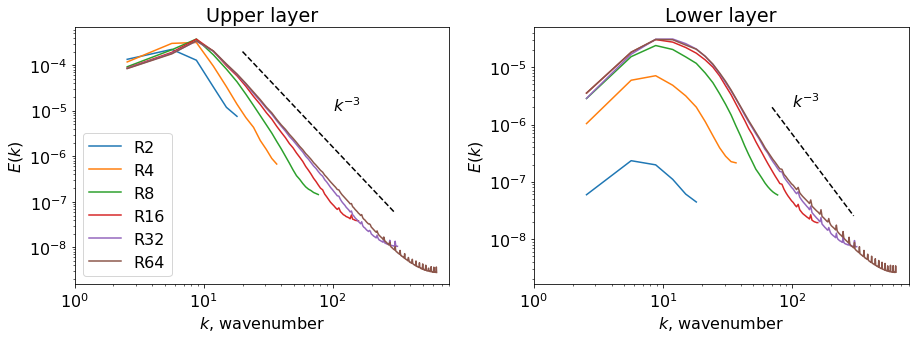

In [316]:
ds.plot_KE_spectrum(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'), tstart=3650., nfactor=2, nd_wavenumber=True)

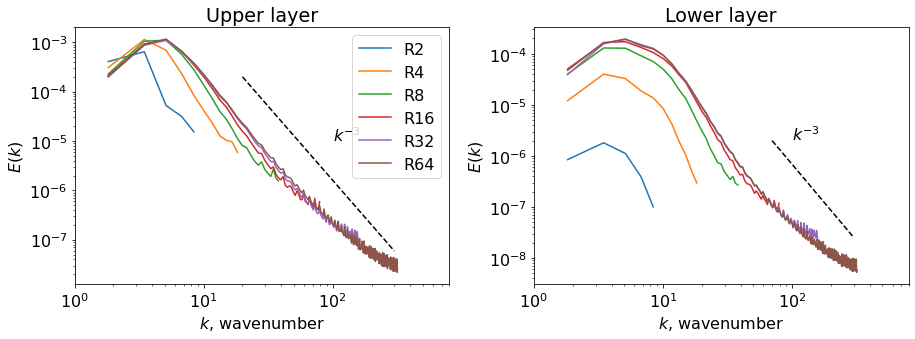

In [315]:
ds.plot_KE_spectrum(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'), tstart=3650., Lat=(35,45), Lon=(5,15), window='rect', nfactor=1, nd_wavenumber=True)

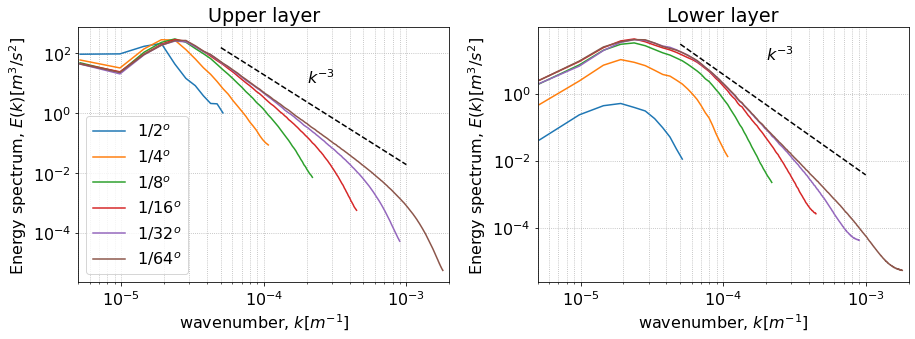

In [119]:
ds.plot_KE_spectrum(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'), 
                    names=['$1/2^o$', '$1/4^o$','$1/8^o$','$1/16^o$','$1/32^o$','$1/64^o$'],
                    tstart=3650., Lat=(30,50), Lon=(0,20), window='hanning', nfactor=1, nd_wavenumber=False)
plt.savefig('Spectrum_domain.png',dpi=150)

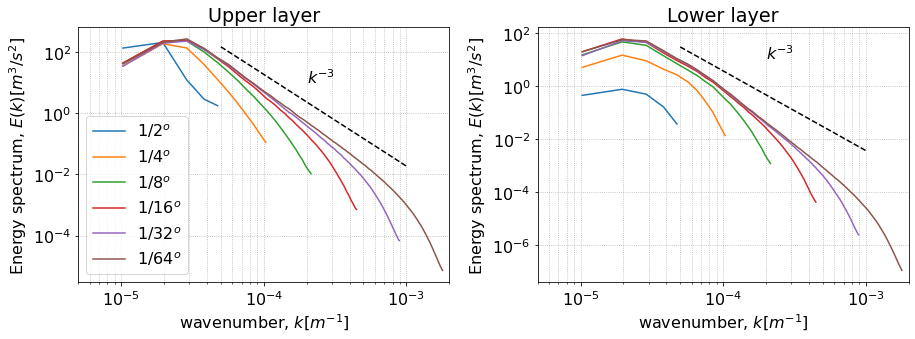

In [118]:
ds.plot_KE_spectrum(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'), 
                    names=['$1/2^o$', '$1/4^o$','$1/8^o$','$1/16^o$','$1/32^o$','$1/64^o$'],
                    tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)
plt.savefig('Spectrum_local.png',dpi=150)

(243, 2, 641, 704)


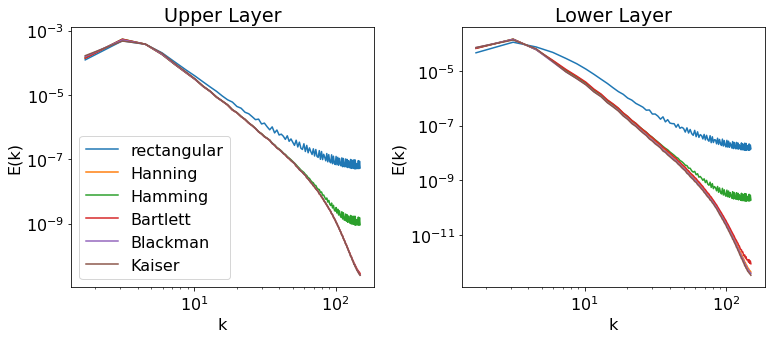

In [322]:
plt.figure(figsize=(11,5))
field = np.array(ds['R32'].prog.v)
print(field.shape)
field = field[:,:,100:400,200:500]
plt.subplot(121)
k, E = compute_spectrum(field[:,0,:,:], 'rect', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,0,:,:], 'hanning', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,0,:,:], 'hamming', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,0,:,:], 'bartlett', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,0,:,:], 'blackman', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,0,:,:], 'kaiser', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
plt.xlabel('k')
plt.ylabel('E(k)')
plt.title('Upper Layer')
plt.legend(('rectangular', 'Hanning', 'Hamming', 'Bartlett', 'Blackman', 'Kaiser'))
plt.subplot(122)
k, E = compute_spectrum(field[:,1,:,:], 'rect', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,1,:,:], 'hanning', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,1,:,:], 'hamming', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,1,:,:], 'bartlett', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,1,:,:], 'blackman', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,1,:,:], 'kaiser', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)

plt.xlabel('k')
plt.ylabel('E(k)')
plt.title('Lower Layer')
plt.tight_layout()
plt.show()

# Energy cospectrum of biharmonic Smagorinsky

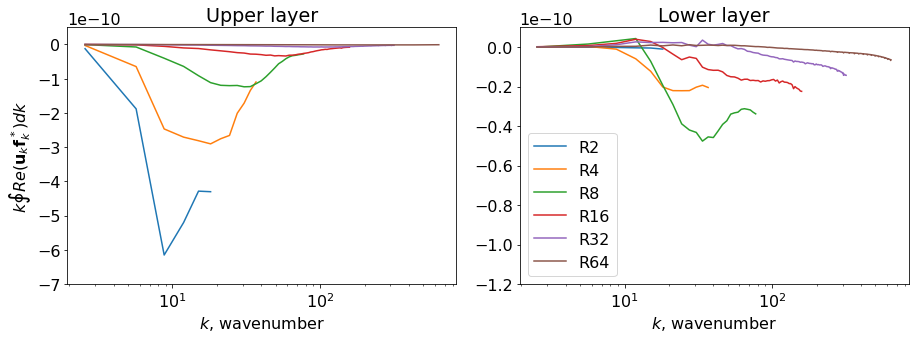

In [333]:
ds.plot_cospectrum(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'), tstart = 3650., nfactor=2, averaging=False, nd_wavenumber=True)

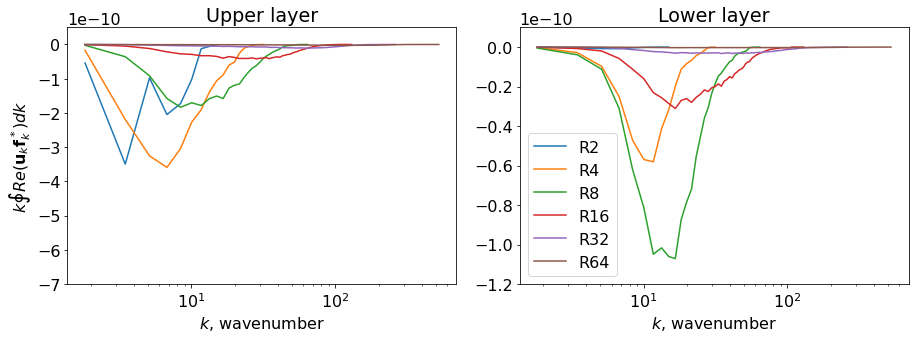

In [334]:
ds.plot_cospectrum(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'), tstart = 3650., Lat=(35,45), Lon=(5,15), window='rect', averaging=False, nfactor=1, truncate=False, nd_wavenumber=True)

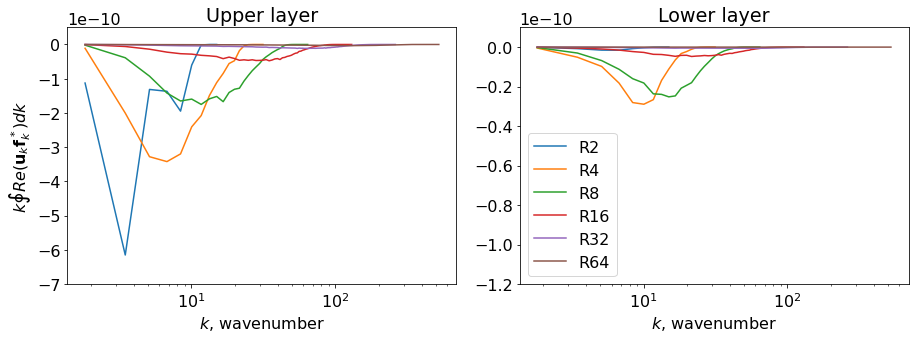

In [335]:
ds.plot_cospectrum(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'), tstart = 3650., Lat=(35,45), Lon=(5,15), window='hanning', averaging=False, nfactor=1, truncate=False, nd_wavenumber=True)

# Analysis of mean flow: 10-years mean Sea Surface Height

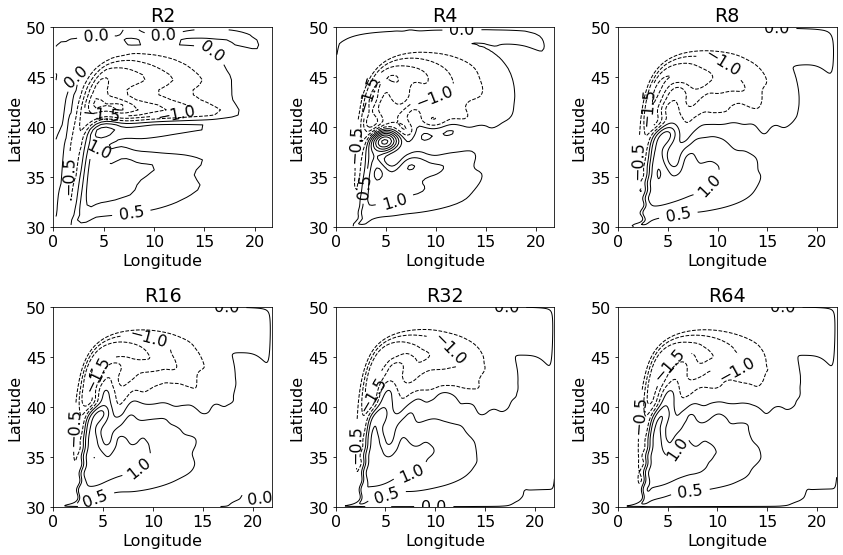

In [167]:
ds.plot_ssh(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'))

# Analysis of Kinetic Energy w.r.t. $1/64^o$ model

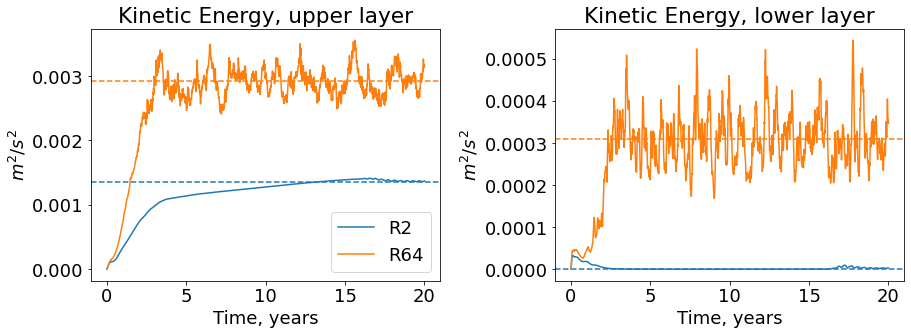

In [168]:
ds.plot_KE(('R2', 'R64'))

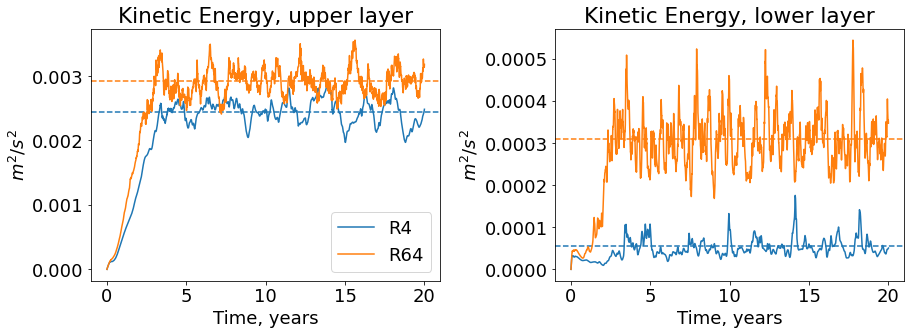

In [169]:
ds.plot_KE(('R4', 'R64'))

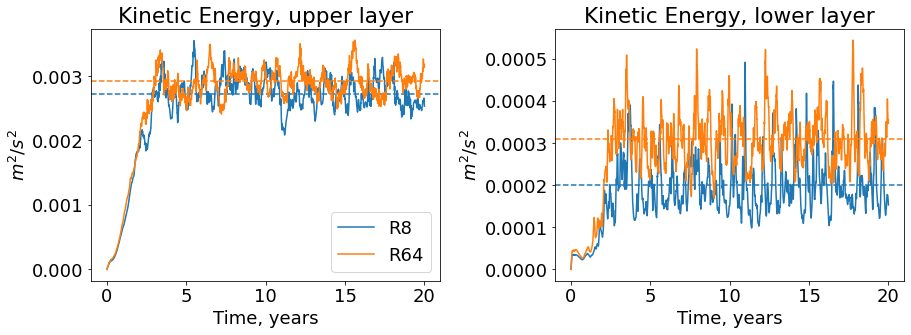

In [170]:
ds.plot_KE(('R8', 'R64'))

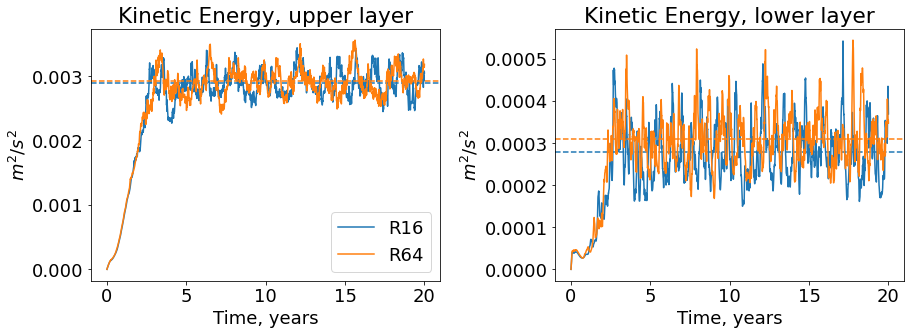

In [171]:
ds.plot_KE(('R16', 'R64'))

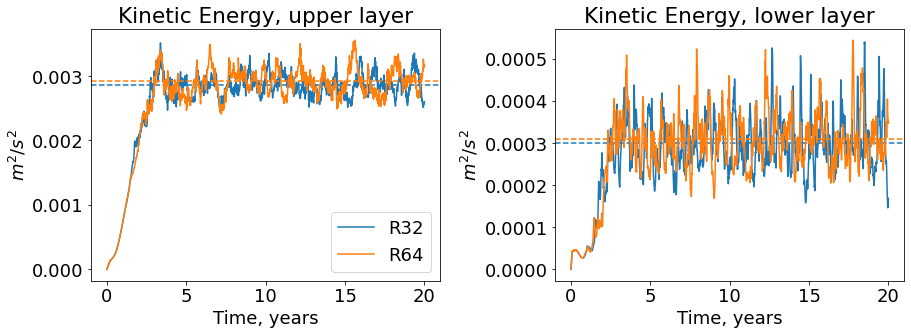

In [172]:
ds.plot_KE(('R32', 'R64'))